In [1]:
using Images, Interpolations, TestImages, ImageTransformations, CoordinateTransformations, Rotations
using LinearAlgebra


In [3]:
struct ImageInterpolator
    method::Symbol
end

function _nearest(img, y, x, outofrange=0)
    h, w = size(img)
    xx, yy = round(Int, x), round(Int, y)
    if xx<1 || xx > w || yy<1 || yy>h 
        return outofrange
    else
        return img[yy, xx] 
    end
end 

function _bilinear(img, y, x, outofrange=0)
    h, w = size(img)
    xx, yy = floor(Int, x), floor(Int, y)
    if xx <1 || xx > w-1 || yy < 1 || yy > h -1
        return outofrange
    else
        I11, I12, I21, I22 = img[yy,xx], img[yy+1,xx], img[yy, xx+1], img[yy+1,xx+1]
        dx, dy = x-xx, y-yy
        return I11*(1-dx)*(1-dy) + I12*dy*(1-dx) + I21 *dx*(1-dy) + I22 * dx*dy
    end
end

function get_warp_by_rotation_translation(θ, t)
    return [cos(θ) -sin(θ) t[1]; sin(θ) cos(θ) t[2]; 0 0 1]
end

function _center(img::Matrix)
    h, w = size(img)
    return [(h+1)/2, (w+1)/2]
end

function transform(img::Matrix, warp::Matrix)
    W=inv(warp)
end


transform (generic function with 1 method)

In [87]:
img1 = reshape(collect(1:110), (10, 11));
# print(_nearest(img1, 3.3, 4.4))
print(_bilinear(img1, 3.01, 4.99))

0.9900000000000002, 0.009999999999999787, 33
33, 34, 43, 44
42.910000000000004

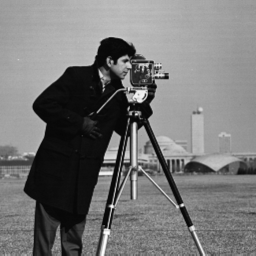

In [4]:
X = imresize(testimage("cameraman"), (256,256))

In [116]:
size(X)

(128, 128)

In [93]:
itp = interpolate(X, BSpline(Linear())) # bilinear interpolation
τ(q) = itp(q...)


τ (generic function with 1 method)

In [94]:
K = (size(X) .- (1, 1))./(sz .- (1, 1))
b = (1, 1) .- K
ϕ(p) = @. K*p + b


ϕ (generic function with 1 method)

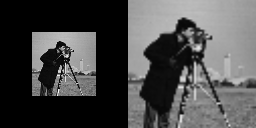

In [95]:
for p in CartesianIndices(Y)
    q = ϕ(p.I)
    Y[p] = τ(q)
end

mosaic(X, Y; nrow=1)

In [102]:
t = recenter(RotMatrix(π/4), center(X))

AffineMap([0.7071067811865476 -0.7071067811865475; 0.7071067811865475 0.7071067811865476], [32.49999999999999, -13.46194077712559])

In [105]:
center(X)

2-element StaticArraysCore.SVector{2, Float64} with indices SOneTo(2):
 32.5
 32.5

In [107]:
size(X)

(64, 64)

In [111]:
get_warp_by_rotation_translation(π/4, [1.0, 2.0])

3×3 Matrix{Float64}:
 0.707107  -0.707107  1.0
 0.707107   0.707107  2.0
 0.0        0.0       1.0

In [6]:
[p for p in CartesianIndices(X)]


256×256 Matrix{CartesianIndex{2}}:
 CartesianIndex(1, 1)    CartesianIndex(1, 2)    …  CartesianIndex(1, 256)
 CartesianIndex(2, 1)    CartesianIndex(2, 2)       CartesianIndex(2, 256)
 CartesianIndex(3, 1)    CartesianIndex(3, 2)       CartesianIndex(3, 256)
 CartesianIndex(4, 1)    CartesianIndex(4, 2)       CartesianIndex(4, 256)
 CartesianIndex(5, 1)    CartesianIndex(5, 2)       CartesianIndex(5, 256)
 CartesianIndex(6, 1)    CartesianIndex(6, 2)    …  CartesianIndex(6, 256)
 CartesianIndex(7, 1)    CartesianIndex(7, 2)       CartesianIndex(7, 256)
 CartesianIndex(8, 1)    CartesianIndex(8, 2)       CartesianIndex(8, 256)
 CartesianIndex(9, 1)    CartesianIndex(9, 2)       CartesianIndex(9, 256)
 CartesianIndex(10, 1)   CartesianIndex(10, 2)      CartesianIndex(10, 256)
 ⋮                                               ⋱  ⋮
 CartesianIndex(248, 1)  CartesianIndex(248, 2)     CartesianIndex(248, 256)
 CartesianIndex(249, 1)  CartesianIndex(249, 2)     CartesianIndex(249, 256)
 Carte

In [14]:
ca=CartesianIndex(1,2)

CartesianIndex(1, 2)

In [18]:
typeof([1 2;3 4])

Matrix{Int64} (alias for Array{Int64, 2})